In [1]:
import json
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from laspy.file import File
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
def generate_bounding_cube(X, Y, Z):
    # Create cubic bounding box to simulate equal aspect ratio
    max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
    return Xb, Yb, Zb

In [3]:
pcFile = File('../data/point_cloud.las', mode='r')
with open('../data/point_cloud_classes.json') as f:
    meta_data = json.load(f)
mapping = meta_data['mapping']
inverted_mapping = {v:k  for k,v in mapping.items()}

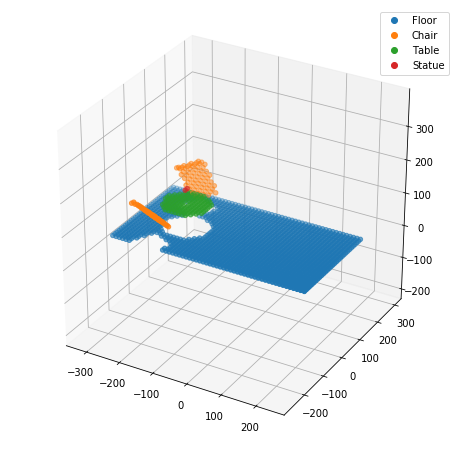

In [4]:
COLOR_PALETTE = sns.color_palette()

fig, ax = plt.subplots(figsize=(8,8), nrows=1, ncols=1, subplot_kw=dict(projection='3d'))
X = pcFile.X; Y = pcFile.Y; Z = pcFile.Z
C = [COLOR_PALETTE[index] for index in pcFile.Classification]

ax.scatter(X, Y, Z, c=C)

Xb, Yb, Zb = generate_bounding_cube(X, Y, Z)
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
    ax.plot([xb], [yb], [zb], 'w')

proxies = []
for k, label in inverted_mapping.items():
    proxies.append(plt.Line2D([0],[0], linestyle="none", c=COLOR_PALETTE[k],marker = 'o'))

ax.legend(proxies, inverted_mapping.values(), numpoints = 1)